In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import os
from tqdm import tqdm

In [3]:
path = r'archive\real_and_fake_face\training_real'

### Defining the function 

In [4]:
x_c = []
y_c = []
width_c = []
height_c = []
num_face = []
img_name = []

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    
    img_name_temp = x_temp[j]
    img_arr = np.array(img)
    
    face_rect = face_cascade.detectMultiScale(img_arr,
                                              scaleFactor = 1.2,
                                              minNeighbors = 5) 
    for (x, y, w, h) in face_rect:
        cv2.rectangle(img_arr, (x, y), (x + w, y + h), (255, 255, 255), 10)
    
    length = len(face_rect)
    e = 0
    
    if length == 0:
        a = 0
        b = 0
        c = 0
        d = 0
    else:
        a = face_rect[0][0]
        b = face_rect[0][1]
        c = face_rect[0][2]
        d = face_rect[0][3]
        e = 1
    
    x_c.append(a)
    y_c.append(b)
    width_c.append(c)
    height_c.append(d)
    num_face.append(e)
    img_name.append(img_name_temp)
    
    return img_arr

In [7]:
x_temp = []
for i in os.listdir(path):
    x_temp.append(i)

In [8]:
df_name = pd.DataFrame(x_temp, columns = ['Name'])
df_name['path'] = path + '/' + df_name['Name']
df_name.head(3)

,Name,path
0,real_00001.jpg,archive\real_and_fake_face\training_real/real_...
1,real_00002.jpg,archive\real_and_fake_face\training_real/real_...
2,real_00003.jpg,archive\real_and_fake_face\training_real/real_...


### Importing 

In [9]:
j = 0
for i in tqdm(df_name['path']):
    img = cv2.imread(i)[:,:,::-1]
    img = detect_face(img)
    j += 1

100%|██████████████████████████████████████| 1081/1081 [01:53<00:00,  9.54it/s]


In [10]:
list_df = {'x' : x_c,
           'y' : y_c,
           'width' : width_c,
           'height' : height_c,
           'Total_faces' : num_face,
           'Image_name' : img_name}

### Dataframe 

In [11]:
df = pd.DataFrame(list_df)
df.sample(10)

,x,y,width,height,Total_faces,Image_name
760,0,0,0,0,0,real_00761.jpg
733,76,116,418,418,1,real_00734.jpg
859,52,31,477,477,1,real_00860.jpg
251,104,154,397,397,1,real_00252.jpg
482,47,44,498,498,1,real_00483.jpg
86,103,203,353,353,1,real_00087.jpg
359,71,112,426,426,1,real_00360.jpg
458,132,220,330,330,1,real_00459.jpg
206,40,146,389,389,1,real_00207.jpg
193,59,140,387,387,1,real_00194.jpg


### Sample 

In [12]:
j = 0
img_sample = cv2.imread(path + '/' + 'real_00001.jpg')[:,:,::-1]
face_temp = detect_face(img_sample)

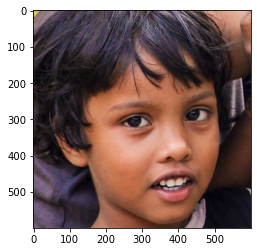

In [13]:
plt.imshow(img_sample)

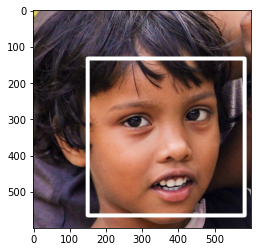

In [14]:
 plt.imshow(face_temp)

### Exporting 

In [15]:
df.to_csv('coordinate.csv')

### Note 

* Thanks to the OpenCV library, where we can get the coordinates of the images in no time.
* This function finds the coordinates automatically, however, from the above sample, we can see that the coordinate is not accurately fit the image.
* If we want an accurate coordinate then, we have to draw them for all the images. But it's a time-consuming method.